# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Zhafarullah Ahmad
- **Email:** ahmadzhafarullah@gmail.com
- **ID Dicoding:** zhafarullahahmad

## Menentukan Pertanyaan Bisnis

- Bagaimana dampak cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana pola penyewaan registered_rentals pada hari kerja dan non-kerja?
- Musim apa yang paling banyak atau paling sedikit penyewaan?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat dataset day_df

In [180]:
url = 'https://drive.google.com/uc?id=1Qk5womJkgPOZ4x2CMfE2Kc1OlfXGaKD2'
day_df = pd.read_csv(url)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memuat dataset hour_df

In [181]:
url = 'https://drive.google.com/uc?id=1f0ZIb9hduI4MowuVo9NFlYuTTT7MeiFq'
hour_df = pd.read_csv(url)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Tabel `day_df`



In [182]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dtype dtday lebih baik menggunakan timestamp agar mudah di analisa

##### Mengecek Missing Value

In [183]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak terdapat missing value apapun

##### Mengecek duplikasi data

In [184]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


##### Memuat ringkasan parameter statistik

In [185]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak terdapat keanehan dari statistik data tersebut

#### Menilai Tabel `hour_df`



In [186]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dtype dtday lebih baik menggunakan timestamp agar mudah di analisa

##### Mengecek Missing Value

In [187]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak terdapat missing value apapun

##### Mengecek Duplikasi Data

In [188]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


##### Membuat ringkasan parameter statistik

In [189]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat keanehan dari statistik data tersebut

**Insight:**


Terdapat beberapa hal yang perlu diubah untuk memudahkan pembaca dan memudahkan analisa
1. Tipe Data:

* dteday ➡️ Ubah dari object ke datetime
* Kategori Data (Mapping Label):

  * season: 1 ➡️ Spring, 2 ➡️ Summer, 3 ➡️ Fall, 4 ➡️ Winter
  * yr: 0 ➡️ 2011, 1 ➡️ 2012
  * holiday: 0 ➡️ Non-Holiday, 1 ➡️ Holiday
  * workingday: 0 ➡️ Non-Working Day, 1 ➡️ Working Day
  * weathersit:
    * 1 ➡️ Clear
    * 2 ➡️ Mist + Cloudy
    * 3 ➡️ Light Snow/Light Rain
    * 4 ➡️ Heavy Rain + Thunderstorm
2. Normalisasi Data (Kembali ke Satuan Asli):

  * temp: x * 41 (Celsius)
  * atemp: x * 50 (Celsius)
  * hum: x * 100 (%)
  * windspeed: x * 67 (km/h)
3. Kolom Tidak Diperlukan:

* instant (Record Index) ➡️ Bisa dihapus
4. Perubahan Nama Kolom:

* dteday ➡️ date
* yr ➡️ year
* mnth ➡️ month
* atemp ➡️ feel_temp
* hum ➡️ humidity
* cnt ➡️ total_rentals
* casual ➡️ casual_rentals
* registered ➡️ registered_rentals

### Cleaning Data

#### Mengubah tipe data

In [190]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Mengubah tipe data dteday menjadi timestamp

#### Mengubah isi agar mudah dipahami

In [191]:
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['yr'] = day_df['yr'].map({0: 2011, 1: 2012})
day_df['holiday'] = day_df['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})
day_df['workingday'] = day_df['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Light Rain',
    4: 'Heavy Rain + Thunderstorm'
})

hour_df['season'] = hour_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['yr'] = hour_df['yr'].map({0: 2011, 1: 2012})
hour_df['holiday'] = hour_df['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})
hour_df['workingday'] = hour_df['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Light Rain',
    4: 'Heavy Rain + Thunderstorm'
})



Isi setiap cell diperbarui agar mudah dimengerti, panduan pengubahan berdasarkan catatan dari sumber dataset

#### Normalisasi satuan

In [192]:
day_df['temp'] = day_df['temp'] * 41
day_df['atemp'] = day_df['atemp'] * 50
day_df['hum'] = day_df['hum'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67

hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67


Mengubah angka satuan ke angka yang lebih umum

#### Mengubah Nama Kolom

In [193]:
day_df.rename(columns={
    'dteday': 'date',
    'mnth': 'month',
    'yr': 'year',
    'hum': 'humidity',
    'atemp': 'feel_temp',
    'cnt': 'total_rentals',
    'casual': 'casual_rentals',
    'registered': 'registered_rentals'
}, inplace=True)
hour_df.rename(columns={
    'dteday': 'date',
    'mnth': 'month',
    'yr': 'year',
    'hum': 'humidity',
    'atemp': 'feel_temp',
    'cnt': 'total_rentals',
    'casual': 'casual_rentals',
    'registered': 'registered_rentals'
}, inplace=True)


mengubah nama kolom agar lebih mudah dipahami

#### Drop kolom instant

In [194]:
hour_df.drop(['instant'], axis = 1, inplace= True)
day_df.drop(['instant'], axis = 1, inplace= True)

Drop kolom instant karena hanya merupakan pengurutan yang tidak penting dalam analisa

#### Menampilkan bentuk final `day_df`

In [195]:
day_df.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual_rentals,registered_rentals,total_rentals
0,2011-01-01,Spring,2011,1,Non-Holiday,6,Non-Working Day,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,1,Non-Holiday,0,Non-Working Day,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,1,Non-Holiday,1,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,1,Non-Holiday,2,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,1,Non-Holiday,3,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Menampilkan bentuk final `hour_df`

In [196]:
hour_df.head()

,date,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual_rentals,registered_rentals,total_rentals
0,2011-01-01,Spring,2011,1,0,Non-Holiday,6,Non-Working Day,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,1,1,Non-Holiday,6,Non-Working Day,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,1,2,Non-Holiday,6,Non-Working Day,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,1,3,Non-Holiday,6,Non-Working Day,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,1,4,Non-Holiday,6,Non-Working Day,Clear,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- Tipe data date diubah ke datetime untuk mempermudah analisis
- Mengubah isi agar mudah dipahami
- Mengubah kolom agar mudah dipahami
- Menghapus kolom kolom yang tidak perlu

## Exploratory Data Analysis (EDA)

### Explore Data hour_df


In [197]:
hour_df.describe(include="all")

,date,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual_rentals,registered_rentals,total_rentals
count,17379,17379,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,NaN,NaN,2,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,NaN,NaN,Non-Holiday,NaN,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,NaN,NaN,16879,NaN,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,6.537775,11.546752,NaN,3.003683,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,2011.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,2011.000000,4.000000,6.000000,NaN,1.000000,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,2012.000000,7.000000,12.000000,NaN,3.000000,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,2012.000000,10.000000,18.000000,NaN,5.000000,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,2012.000000,12.000000,23.000000,NaN,6.000000,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


Berdasarkan rangkuman hour_df, jumlah pelanggan yaitu 1739

### Explore Data day_df


In [198]:
day_df.describe(include="all")

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,feel_temp,humidity,windspeed,casual_rentals,registered_rentals,total_rentals
count,731,731,731.000000,731.000000,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,NaN,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,NaN,Non-Holiday,NaN,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,NaN,710,NaN,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,2011.500684,6.519836,NaN,2.997264,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,2011.000000,1.000000,NaN,0.000000,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,2011.000000,4.000000,NaN,1.000000,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,2012.000000,7.000000,NaN,3.000000,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,2012.000000,10.000000,NaN,5.000000,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,2012.000000,12.000000,NaN,6.000000,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Melihat hubungan cuaca dan rata rata perental sepeda

In [199]:
extreme_weather = day_df[day_df["weathersit"].isin(["3", "4"])]

normal_weather = day_df[day_df["weathersit"].isin(["1", "2"])]

pivot_weather = day_df.groupby("weathersit").agg({
    "total_rentals": ["mean", "sum", "count"]
}).reset_index()

pivot_weather.columns = ["Weather Situation", "Average Rentals", "Total Rentals", "Total Occurrences"]
pivot_weather

,Weather Situation,Average Rentals,Total Rentals,Total Occurrences
0,Clear,4876.786177,2257952,463
1,Light Snow/Light Rain,1803.285714,37869,21
2,Mist + Cloudy,4035.862348,996858,247


Cuaca memiliki dampak signifikan terhadap jumlah penyewaan sepeda. Berdasarkan hasil analisis, jumlah penyewaan tertinggi terjadi saat cuaca cerah dengan rata-rata **4876 penyewaan per hari**, sedangkan pada hujan ringan menurun hingga **1803 penyewaan per hari**.

##### Melihat hubungan antara pengguna terdaftar dan hari kerja

In [200]:

result = day_df.groupby("workingday").agg({
    "registered_rentals": "mean"
}).reset_index()

result


,workingday,registered_rentals
0,Non-Working Day,2959.034632
1,Working Day,3978.250000


Berdasarkan hasil tersebut, rata-rata penyewaan sepeda oleh pengguna **registered_rentals** lebih tinggi pada **hari kerja (3978)** dibandingkan pada **hari non-kerja (2959)**. Hal ini menunjukkan bahwa pengguna terdaftar cenderung lebih aktif menggunakan sepeda pada hari kerja, kemungkinan besar untuk keperluan komuter atau aktivitas rutin.

##### Melihat hubungan season dan total rental

In [210]:
season_table = day_df.groupby("season").agg({
    "total_rentals": "sum"
}).reset_index().sort_values(by="total_rentals", ascending=False)

season_table

,season,total_rentals
0,Fall,1061129
2,Summer,918589
3,Winter,841613
1,Spring,471348


Berdasarkan tabel tersebut, musim dengan permintaan penyewaan sepeda terbanyak adalah **Fall (1.061.129)**, diikuti oleh **Summer (918.589)**, dan **Winter (841.613)**. Sementara itu, musim dengan permintaan paling sedikit adalah **Spring (471.348)**. Hal ini menunjukkan bahwa penyewaan sepeda cenderung lebih tinggi pada musim yang memiliki cuaca lebih hangat dan nyaman dibandingkan musim dingin atau musim semi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana dampak cuaca terhadap jumlah penyewaan sepeda?



<ipython-input-202-6a4fe5354d14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Weather Situation", y="Average Rentals", data=pivot_weather, palette="coolwarm")


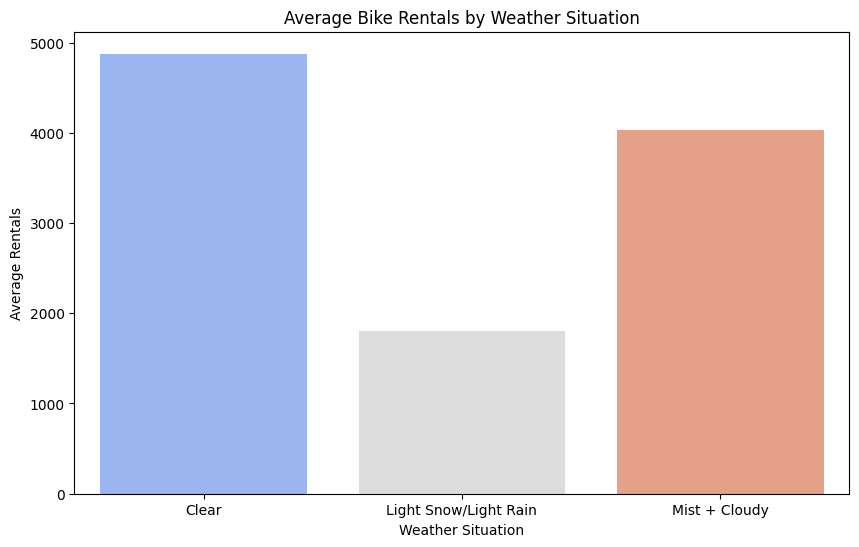

In [202]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Weather Situation", y="Average Rentals", data=pivot_weather, palette="coolwarm")
plt.title("Average Bike Rentals by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Average Rentals")
plt.xticks(rotation=0)
plt.show()


Terlihat bahwa saat cuaca cerah (clear) penyewaan sepeda paling banyak sedangkan, saat cuaca berkabut dan berawan (mist+cloudy) mulai berkurang sekitar 4035, lalu saat hujan ringan penyewaan sepeda paling rendah per hari nya

### Pertanyaan 2: Bagaimana pola penyewaan registered_rentals pada hari kerja dan non-kerja?


<ipython-input-203-a0bb12823287>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="workingday", y="registered_rentals", data=result, palette="Blues")


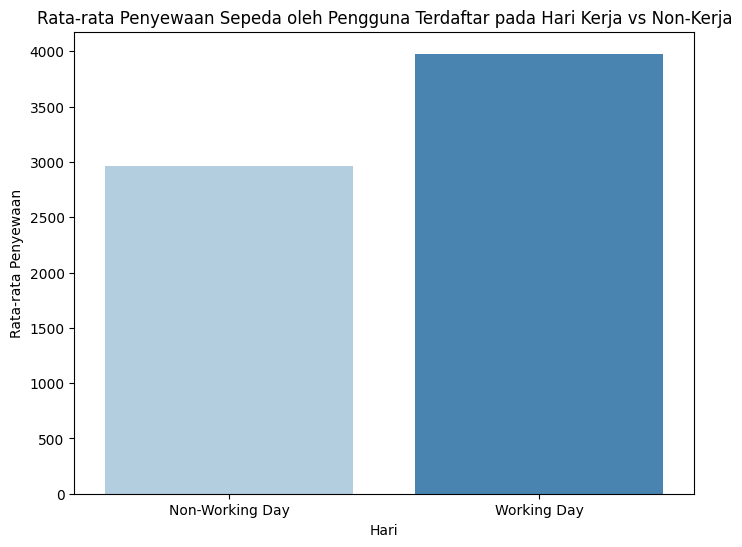

In [203]:
plt.figure(figsize=(8, 6))
sns.barplot(x="workingday", y="registered_rentals", data=result, palette="Blues")

plt.title("Rata-rata Penyewaan Sepeda oleh Pengguna Terdaftar pada Hari Kerja vs Non-Kerja")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.show()


Terlihat bahwa pengguna yang telah mendaftarkan diri mereka lebih banyak menyewa sepeda pada hari kerja (3978) daripada saat hari tidak kerja (2959)

### Pertanyaan 3 : Musim apa yang paling banyak atau paling sedikit penyewaan?


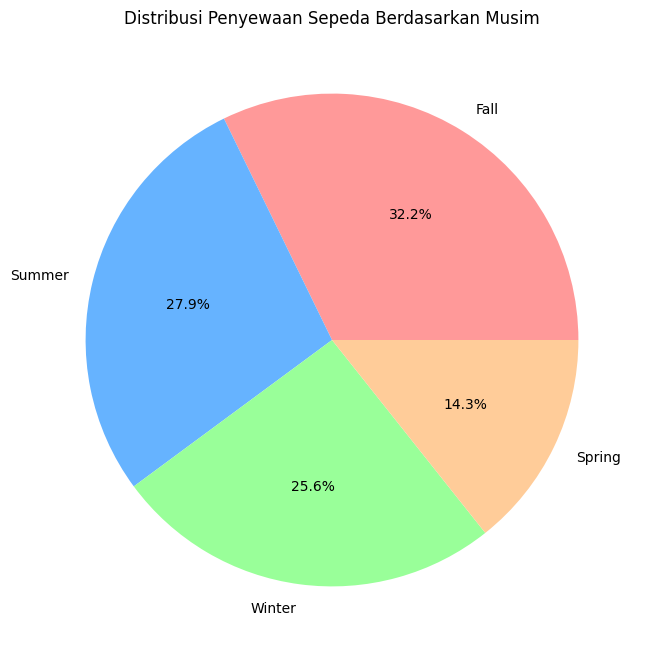

In [211]:
plt.figure(figsize=(8, 8))
plt.pie(season_table["total_rentals"], labels=season_table["season"], autopct="%1.1f%%", colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"])

plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")

plt.show()


Penyewaan sepeda paling banyak dimusim Gugur dan musim panas (32,2% dan 27.9%) lalu Winter sedikit lebih rendah daripada di Summer (25.6%) sementara paling rendah di musim semi (14.3%)

## Analisis Lanjutan (Opsional)

#### RFM Analysis

Tujuan dari RFM analysis yang dilakukan untuk memahami:
- Recency: Menghitung selisih hari dari tanggal terakhir penyewaan.
- Frequency: Menghitung berapa kali sepeda disewa berdasarkan weekday.
- Monetary: Total jumlah sewa pada setiap weekday.

In [205]:
rfm_df = day_df.copy()

weekday_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
rfm_df['weekday'] = rfm_df['weekday'].map(weekday_mapping)

# 1. Recency (R)
latest_date = rfm_df['date'].max()
rfm_df['Recency'] = (latest_date - rfm_df['date']).dt.days

# 2. Frequency (F)
frequency = rfm_df.groupby("weekday").agg({"date": "nunique"}).reset_index()
frequency.columns = ["weekday", "Frequency"]

# 3. Monetary (M)
monetary = rfm_df.groupby("weekday").agg({"total_rentals": "sum"}).reset_index()
monetary.columns = ["weekday", "Monetary"]

rfm_table = frequency.merge(monetary, on="weekday")

rfm_table = rfm_table.merge(rfm_df[['weekday', 'Recency']].drop_duplicates(), on='weekday')

rfm_table = rfm_table.sort_values(by=["Monetary"], ascending=False)

rfm_table



,weekday,Frequency,Monetary,Recency
0,Friday,104,487790,724
53,Friday,104,487790,353
77,Friday,104,487790,185
76,Friday,104,487790,192
75,Friday,104,487790,199
...,...,...,...,...
344,Sunday,105,444027,519
343,Sunday,105,444027,526
342,Sunday,105,444027,533
341,Sunday,105,444027,540


##### Visualisasi RFM

<ipython-input-206-dd9ee381d688>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm_table, x='weekday', y='Monetary', palette='viridis', order=[


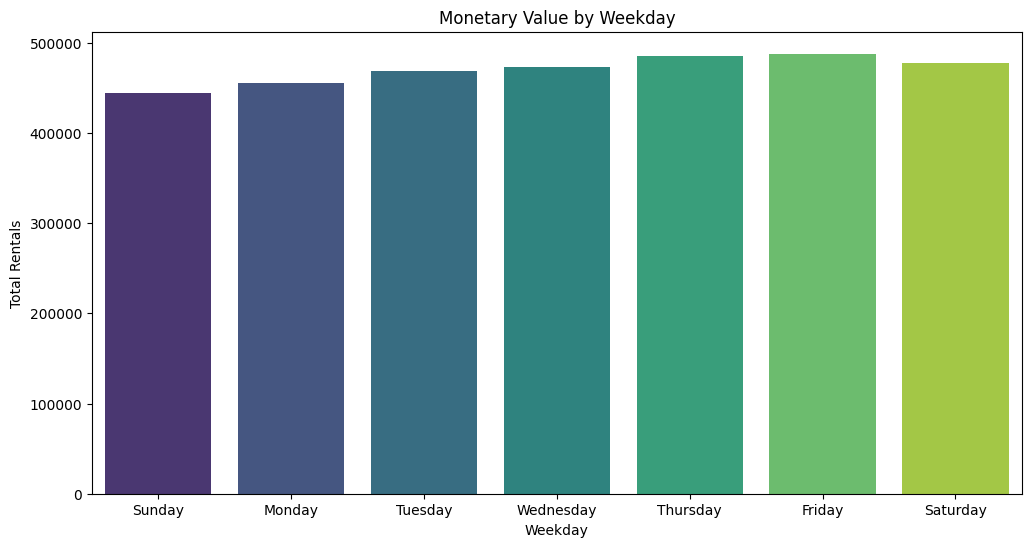

In [206]:
plt.figure(figsize=(12, 6))
sns.barplot(data=rfm_table, x='weekday', y='Monetary', palette='viridis', order=[
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'
])
plt.title("Monetary Value by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Rentals")
plt.show()


In [207]:
day_df.to_csv("day_df_final.csv", index=False)
hour_df.to_csv("hour_df_final.csv", index=False)

## Conclusion

-  Bagaimana dampak cuaca terhadap jumlah penyewaan sepeda?
  - Cuaca memiliki dampak signifikan terhadap jumlah penyewaan sepeda. Berdasarkan hasil analisis, jumlah penyewaan tertinggi terjadi saat cuaca cerah dengan rata-rata **4876 penyewaan per hari**, sedangkan pada hujan ringan menurun hingga **1803 penyewaan per hari**.
- Bagaimana pola penyewaan registered_rentals pada hari kerja dan non-kerja?
  - registered_rentals lebih banyak menyewa saat hari kerja (3978 penyewaan) dibandingkan saat hari libur (2959)
- Musim apa yang paling banyak atau paling sedikit penyewaan?
  - Penyewaan sepeda paling banyak dimusim Gugur (32,2%) lalu paling rendah di musim semi (14.3%)
